In [64]:
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

import xgboost as xgb

import matplotlib.pyplot as plt

In [6]:
# load in test set
test_set_distance_mean = pd.read_csv('/path/to/9_FINAL/data/machine_learning/two_class/distance_test/test_distance_mean.csv',
                                     sep=";")
test_set_distance_mean.head()

,id,p1,p10,p11,p12a,p12b,p12c,p13,p14,p15a,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4688,0.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0
3,5628,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# get labels to the test set
labels_test = pd.read_csv('/path/to/9_FINAL/data/machine_learning/two_class/one-hot-ecoding/test/one_hot_test.csv',
                         sep=";", index_col=0)
labels_test.head()

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label
0,metlife,story,2,2,2,37522232,"['p8b', 'p5']",0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,loyalty,manufacturer,11,3,10,513056372,"['p20a', 'p1', 'p34']",1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,educator,curse,1,1,1,359585798,['p8a'],0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,surface,thriller,36,3,33,47160145,"['p8a', 'p8a', 'p8a', 'p8a', 'p8b', 'p8a', 'p8...",0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,intimidation,month,13,2,13,67868282,"['p3a', 'p3a', 'p24', 'p3a']",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# get shape
labels_test.shape

(348121, 66)

In [9]:
# only take id and labesl
labels_test = labels_test[['id', 'frequency',
                           'pidspread', 'pldspread', 'label']]

In [10]:
# merge labels to test
test_set_distance_mean = pd.merge(test_set_distance_mean,
                                 labels_test, left_on='id', right_on='id', how='right')
test_set_distance_mean.shape

(348121, 63)

In [11]:
# get head of data
test_set_distance_mean.head()

,id,p1,p10,p11,p12a,p12b,p12c,p13,p14,p15a,...,p6,p7,p8a,p8b,p8c,p8d,frequency,pidspread,pldspread,label
0,309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
1,4489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
2,4688,0.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,8.0,0.0,4,4,4,0
3,5628,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,2,2,0
4,7754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0


In [12]:
test_set_distance_mean.shape

(348121, 63)

In [13]:
# pad with 0s
test_set_distance_mean = test_set_distance_mean.fillna(0)
test_set_distance_mean[test_set_distance_mean.isna()]

,id,p1,p10,p11,p12a,p12b,p12c,p13,p14,p15a,...,p6,p7,p8a,p8b,p8c,p8d,frequency,pidspread,pldspread,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
test_set_distance_mean

,id,p1,p10,p11,p12a,p12b,p12c,p13,p14,p15a,...,p6,p7,p8a,p8b,p8c,p8d,frequency,pidspread,pldspread,label
0,309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
1,4489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
2,4688,0.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,8.0,0.0,4,4,4,0
3,5628,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,2,2,0
4,7754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348116,110669959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
348117,470374953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
348118,350001873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2,0
348119,141657691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,2,0


# 0. XGBoost

In [15]:
# get train set
train = '/path/to/9_FINAL/data/machine_learning/two_class/distance_prepared/validation/cross_validation/means/train_SMOTE/train_0.csv'
train = pd.read_csv(train, sep=";")
train.head()

,id,frequency,pidspread,pldspread,label,p1,p10,p11,p12a,p12b,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,38311536,3,3,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
1,100303775,5,5,4,0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2,222802940,2,2,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,156746587,2,1,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,127204513,1,1,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# change order of columns
frequency = test_set_distance_mean['frequency']
pidspread = test_set_distance_mean['pidspread']
pldspread = test_set_distance_mean['pldspread']
test_set_distance_mean.drop(columns={'frequency', 'pidspread', 'pldspread'},
                           inplace=True)

In [17]:
# insert columns to the respective positions
test_set_distance_mean.insert(loc=1, column='pldspread', value=pldspread)
test_set_distance_mean.insert(loc=1, column='pidspread', value=pidspread)
test_set_distance_mean.insert(loc=1, column='frequency', value=frequency)
test_set_distance_mean

,id,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,...,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d,label
0,309,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4489,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4688,4,4,4,0.0,-7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,0
3,5628,3,2,2,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7754,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348116,110669959,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
348117,470374953,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
348118,350001873,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
348119,141657691,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [42]:
# split train and test
X_train = train.drop(columns={'id', 'label'})
y_train = train['label']

X_test = test_set_distance_mean.drop(columns={'id', 'label'})
y_test = test_set_distance_mean['label']

In [43]:
# get XGBoost
#xg = xgb.XGBRFClassifier(random_state=42)
oversample = SMOTE(sampling_strategy=0.2,
                          k_neighbors=5)
X_train, y_train = oversample.fit_resample(X_train, y_train)
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_train, y_train = undersample.fit_resample(X_train, y_train)

In [44]:
# fit model
xg.fit(X_train, y_train)
prediction_test = xg.predict(X_test)

In [45]:
# display metrics in confusion matrix
confusion_matrix(y_test, prediction_test)

array([[322047,  20061],
       [  4731,   1282]])

In [46]:
# append label to test set
test_set_distance_mean['label_xg'] = prediction_test

# 1. MLPClassifier

In [47]:
nnet = MLPClassifier(random_state=42)
nnet.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [48]:
prediction_test = nnet.predict(X_test)

In [49]:
# display metrics in confusion matrix
confusion_matrix(y_test, prediction_test)

array([[309880,  32228],
       [  4208,   1805]])

In [50]:
# append label to test set
test_set_distance_mean['label_nnet'] = prediction_test
test_set_distance_mean['label'] = y_test

In [51]:
test_set_distance_mean[(test_set_distance_mean['label'] == 0) &
      (test_set_distance_mean['label_nnet'] == 0) &
      (test_set_distance_mean['label_xg'] == 0)] 

,id,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,...,p5,p6,p7,p8a,p8b,p8c,p8d,label,label_xg,label_nnet
0,309,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,4489,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4688,4,4,4,0.0,-7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,8.0,0.0,0,0,0
3,5628,3,2,2,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,7754,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348116,110669959,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
348117,470374953,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
348118,350001873,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
348119,141657691,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [52]:
test_set_distance_mean[(test_set_distance_mean['label'] == 1) &
      (test_set_distance_mean['label_nnet'] == 1) &
      (test_set_distance_mean['label_xg'] == 1)] 

,id,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,...,p5,p6,p7,p8a,p8b,p8c,p8d,label,label_xg,label_nnet
771,1631600,3,1,3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,-3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1
1208,2446868,317,24,215,3.951220,-3.000000,0.000000,0.000000,0.0,0.0,...,-5.604167,0.0,6.000000,3.358209,0.000000,3.000000,0.000000,1,1,1
1741,3457314,7,4,6,0.000000,-4.000000,0.000000,0.000000,0.0,0.0,...,-3.500000,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,1,1,1
1769,3508671,2682,37,1388,3.920817,-3.913669,3.184615,6.285714,0.0,0.0,...,-4.586269,0.0,3.340741,3.618421,4.890909,3.948387,4.023121,1,1,1
1934,3810802,658,26,456,3.490566,-3.206897,0.000000,4.666667,0.0,0.0,...,-5.447917,0.0,3.800000,4.511111,0.000000,4.088235,6.625000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292315,512058089,12,3,11,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,-3.750000,0.0,0.000000,3.875000,0.000000,0.000000,0.000000,1,1,1
292485,512311920,3,2,3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,-3.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.000000,1,1,1
292585,512458975,12,3,9,0.000000,-3.333333,0.000000,0.000000,0.0,0.0,...,-3.333333,0.0,0.000000,3.142857,0.000000,0.000000,0.000000,1,1,1
292726,512667279,1940,32,1266,5.078689,-3.185484,4.512821,4.538462,0.0,0.0,...,-4.481848,7.0,0.000000,5.202899,4.597826,7.000000,6.000000,1,1,1


In [53]:
test_set_distance_mean[(test_set_distance_mean['label'] == 0) &
      (test_set_distance_mean['label_nnet'] == 1) &
      (test_set_distance_mean['label_xg'] == 1)] 

,id,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,...,p5,p6,p7,p8a,p8b,p8c,p8d,label,label_xg,label_nnet
13,38073,2,2,2,0.000000,-3.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1
25,70581,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,-3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1
182,430872,9,4,8,0.000000,0.0,0.0,0.0,0.0,0.0,...,-3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1
203,473143,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,-3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1
217,502315,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,-3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293503,514781664,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,-3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1
293530,515007295,7,2,7,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,2.857143,3.0,0.0,0.0,0,1,1
293703,516205604,24,3,15,5.333333,0.0,0.0,0.0,0.0,0.0,...,-6.066667,0.0,0.0,5.333333,0.0,0.0,0.0,0,1,1
293705,516226240,18,3,13,0.000000,0.0,0.0,0.0,0.0,0.0,...,-2.000000,0.0,0.0,2.142857,0.0,0.0,0.0,0,1,1


In [54]:
test_set_distance_mean[(test_set_distance_mean['label'] == 1) &
      (test_set_distance_mean['label_nnet'] == 0) &
      (test_set_distance_mean['label_xg'] == 0)] 

,id,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,...,p5,p6,p7,p8a,p8b,p8c,p8d,label,label_xg,label_nnet
427,898970,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1,0,0
602,1272881,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1,0,0
884,1829974,1,1,1,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
912,1886756,3,2,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1,0,0
1128,2282199,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347643,81907108,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
347924,358939752,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
348046,373317123,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
348058,410332068,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [55]:
# get occurrence in text
test_set_distance_mean['Occurrence_In_Text'] = test_set_distance_mean['frequency'] / test_set_distance_mean['pldspread']

In [56]:
# all zero 
all_zero = test_set_distance_mean[(test_set_distance_mean['label'] == 0) &
                    (test_set_distance_mean['label_nnet'] == 0) &
                    (test_set_distance_mean['label_xg'] == 0)]
all_zero

,id,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,...,p6,p7,p8a,p8b,p8c,p8d,label,label_xg,label_nnet,Occurrence_In_Text
0,309,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.0
1,4489,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.0
2,4688,4,4,4,0.0,-7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,8.0,0.0,0,0,0,1.0
3,5628,3,2,2,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.5
4,7754,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348116,110669959,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.0
348117,470374953,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.0
348118,350001873,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.0
348119,141657691,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.0


In [57]:
# all one
all_one = test_set_distance_mean[(test_set_distance_mean['label'] == 1) &
                    (test_set_distance_mean['label_nnet'] == 1) &
                    (test_set_distance_mean['label_xg'] == 1)]
all_one

,id,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,...,p6,p7,p8a,p8b,p8c,p8d,label,label_xg,label_nnet,Occurrence_In_Text
771,1631600,3,1,3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1.000000
1208,2446868,317,24,215,3.951220,-3.000000,0.000000,0.000000,0.0,0.0,...,0.0,6.000000,3.358209,0.000000,3.000000,0.000000,1,1,1,1.474419
1741,3457314,7,4,6,0.000000,-4.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,1,1,1,1.166667
1769,3508671,2682,37,1388,3.920817,-3.913669,3.184615,6.285714,0.0,0.0,...,0.0,3.340741,3.618421,4.890909,3.948387,4.023121,1,1,1,1.932277
1934,3810802,658,26,456,3.490566,-3.206897,0.000000,4.666667,0.0,0.0,...,0.0,3.800000,4.511111,0.000000,4.088235,6.625000,1,1,1,1.442982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292315,512058089,12,3,11,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,3.875000,0.000000,0.000000,0.000000,1,1,1,1.090909
292485,512311920,3,2,3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,5.000000,0.000000,0.000000,0.000000,1,1,1,1.000000
292585,512458975,12,3,9,0.000000,-3.333333,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,3.142857,0.000000,0.000000,0.000000,1,1,1,1.333333
292726,512667279,1940,32,1266,5.078689,-3.185484,4.512821,4.538462,0.0,0.0,...,7.0,0.000000,5.202899,4.597826,7.000000,6.000000,1,1,1,1.532385


In [58]:
# get mean metrics for frequency, pldapread an occurence
all_zero_chart = all_zero[['frequency', 'pldspread', 'Occurrence_In_Text']]
all_zero_chart = pd.DataFrame(all_zero_chart.mean()).reset_index()
all_zero_chart.columns = ['Metric', 'Value']
all_zero_chart['Class'] = ['Negatives'] * 3
all_zero_chart

,Metric,Value,Class
0,frequency,7.598675,Negatives
1,pldspread,5.680445,Negatives
2,Occurrence_In_Text,1.149958,Negatives


In [59]:
# get mean metrics for frequency, pldapread an occurence
all_one_chart = all_one[['frequency', 'pldspread', 'Occurrence_In_Text']]
all_one_chart = pd.DataFrame(all_one_chart.mean()).reset_index()
all_one_chart.columns = ['Metric', 'Value']
all_one_chart['Class'] = ['Positives'] * 3
all_one_chart

,Metric,Value,Class
0,frequency,195.307008,Positives
1,pldspread,104.000000,Positives
2,Occurrence_In_Text,1.349182,Positives


In [60]:
# all_metrics
metrics = pd.concat([all_zero_chart,
                    all_one_chart])

In [61]:
# two metrics
metrics_two = metrics[metrics.Metric != 'Occurrence_In_Text']
metrics_two

,Metric,Value,Class
0,frequency,7.598675,Negatives
1,pldspread,5.680445,Negatives
0,frequency,195.307008,Positives
1,pldspread,104.000000,Positives


In [62]:
metrics_one = metrics[metrics.Metric == 'Occurrence_In_Text']
metrics_one

,Metric,Value,Class
2,Occurrence_In_Text,1.149958,Negatives
2,Occurrence_In_Text,1.349182,Positives


Text(0, 0.5, 'frequency/pldspread')

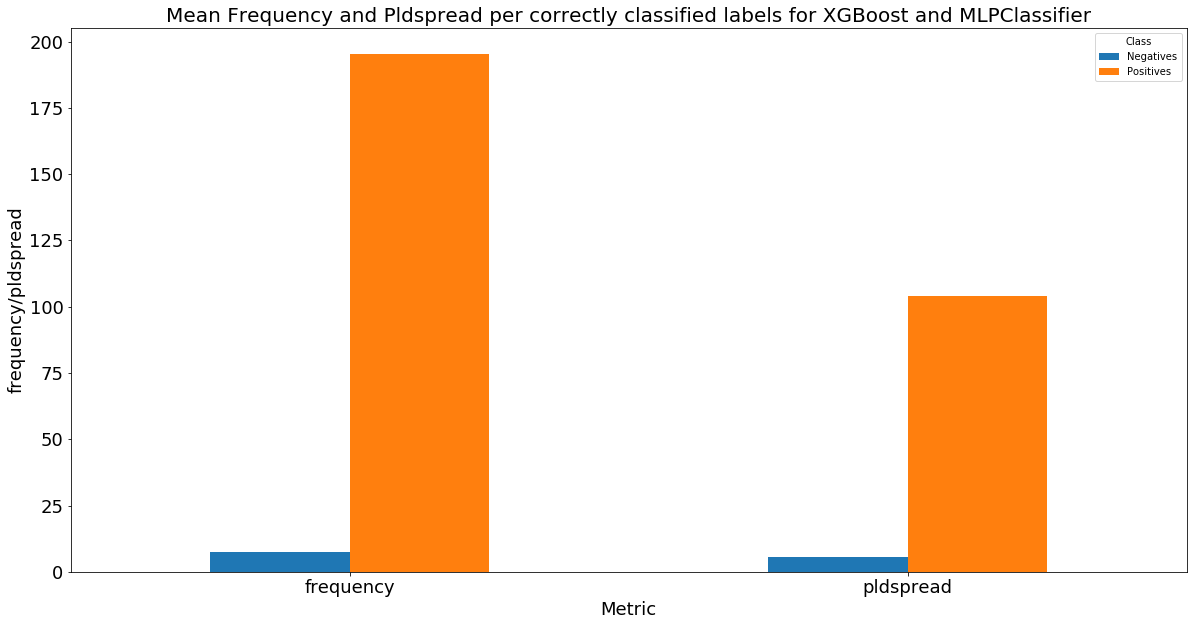

In [65]:
metrics_two.pivot("Metric", "Class", "Value").plot(kind='bar', figsize=(20,10))
plt.title('Mean Frequency and Pldspread per correctly classified labels for XGBoost and MLPClassifier',
         fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.xlabel('Metric', fontsize=18)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel('frequency/pldspread', fontsize=18)
#plt.yticks([0,325])

In [66]:
# all zero 
wrong_as_zero = test_set_distance_mean[(test_set_distance_mean['label'] == 1) &
                    (test_set_distance_mean['label_nnet'] == 0) &
                    (test_set_distance_mean['label_xg'] == 0)]
wrong_as_zero

,id,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,...,p6,p7,p8a,p8b,p8c,p8d,label,label_xg,label_nnet,Occurrence_In_Text
427,898970,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1,0,0,1.0
602,1272881,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,1,0,0,1.0
884,1829974,1,1,1,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1.0
912,1886756,3,2,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1,0,0,1.5
1128,2282199,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347643,81907108,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1.0
347924,358939752,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1.0
348046,373317123,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1.0
348058,410332068,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1.0


In [67]:
# all one
wrong_as_one = test_set_distance_mean[(test_set_distance_mean['label'] == 0) &
                    (test_set_distance_mean['label_nnet'] == 1) &
                    (test_set_distance_mean['label_xg'] == 1)]
wrong_as_one

,id,frequency,pidspread,pldspread,p1,p10,p11,p12a,p12b,p12c,...,p6,p7,p8a,p8b,p8c,p8d,label,label_xg,label_nnet,Occurrence_In_Text
13,38073,2,2,2,0.000000,-3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1,1.000000
25,70581,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1,1.000000
182,430872,9,4,8,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1,1.125000
203,473143,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1,1.000000
217,502315,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293503,514781664,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0,1,1,1.000000
293530,515007295,7,2,7,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.857143,3.0,0.0,0.0,0,1,1,1.000000
293703,516205604,24,3,15,5.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.333333,0.0,0.0,0.0,0,1,1,1.600000
293705,516226240,18,3,13,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.142857,0.0,0.0,0.0,0,1,1,1.384615


In [68]:
# get mean metrics for frequency, pldapread an occurence
all_zero_chart = wrong_as_zero[['frequency', 'pldspread', 'Occurrence_In_Text']]
all_zero_chart = pd.DataFrame(all_zero_chart.mean()).reset_index()
all_zero_chart.columns = ['Metric', 'Value']
all_zero_chart['Class'] = ['Negatives'] * 3
all_zero_chart

,Metric,Value,Class
0,frequency,6.952418,Negatives
1,pldspread,5.391634,Negatives
2,Occurrence_In_Text,1.118337,Negatives


In [69]:
# get mean metrics for frequency, pldapread an occurence
all_one_chart = wrong_as_one[['frequency', 'pldspread', 'Occurrence_In_Text']]
all_one_chart = pd.DataFrame(all_one_chart.mean()).reset_index()
all_one_chart.columns = ['Metric', 'Value']
all_one_chart['Class'] = ['Positives'] * 3
all_one_chart

,Metric,Value,Class
0,frequency,105.299157,Positives
1,pldspread,57.688248,Positives
2,Occurrence_In_Text,1.244829,Positives


In [70]:
# all_metrics
metrics = pd.concat([all_zero_chart,
                    all_one_chart])

In [71]:
# two metrics
metrics_two = metrics[metrics.Metric != 'Occurrence_In_Text']
metrics_two

,Metric,Value,Class
0,frequency,6.952418,Negatives
1,pldspread,5.391634,Negatives
0,frequency,105.299157,Positives
1,pldspread,57.688248,Positives


In [72]:
metrics_one = metrics[metrics.Metric == 'Occurrence_In_Text']
metrics_one

,Metric,Value,Class
2,Occurrence_In_Text,1.118337,Negatives
2,Occurrence_In_Text,1.244829,Positives


Text(0, 0.5, 'frequency/pldspread')

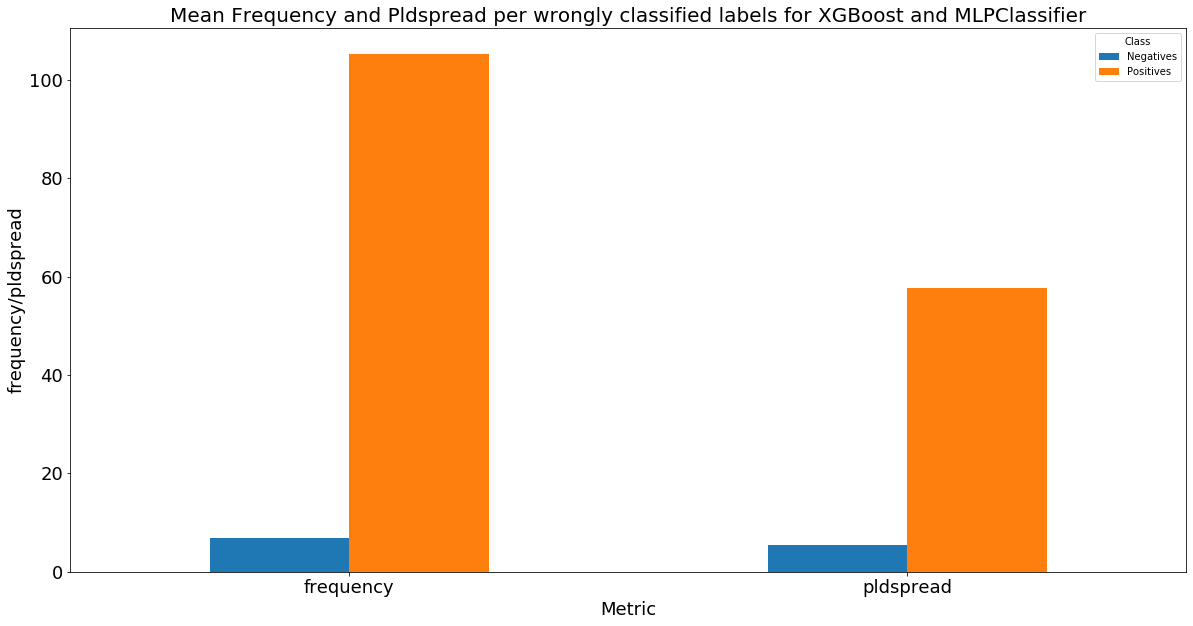

In [77]:
metrics_two.pivot("Metric", "Class", "Value").plot(kind='bar', figsize=(20,10))
plt.title('Mean Frequency and Pldspread per wrongly classified labels for XGBoost and MLPClassifier',
         fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.xlabel('Metric', fontsize=18)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel('frequency/pldspread', fontsize=18)
#plt.ylim(200)

In [79]:
xg_predicted_one = test_set_distance_mean[(test_set_distance_mean['label'] == 1) &
                                          (test_set_distance_mean['label_xg'] == 1)] 

In [87]:
# get means for predicted one on frequency, pidspread and pldspread
meta = xg_predicted_one[['frequency', 'pidspread', 'pldspread']]
meta = pd.DataFrame(meta.mean()) # get mean as dataframe
meta = meta.reset_index()
meta.columns = ['meta_information', 'mean']
meta['class'] = ['Truly classified 1'] * 3
meta

,meta_information,mean,class
0,frequency,182.013261,Truly classified 1
1,pidspread,7.632605,Truly classified 1
2,pldspread,98.757410,Truly classified 1


In [88]:
xg_predicted_one_not_one = test_set_distance_mean[(test_set_distance_mean['label'] == 0) &
                                          (test_set_distance_mean['label_xg'] == 1)] 

In [90]:
# get means for predicted one on frequency, pidspread and pldspread
meta_2 = xg_predicted_one_not_one[['frequency', 'pidspread', 'pldspread']]
meta_2 = pd.DataFrame(meta_2.mean()) # get mean as dataframe
meta_2 = meta_2.reset_index()
meta_2.columns = ['meta_information', 'mean']
meta_2['class'] = ['Wrongly classified 1'] * 3
meta_2

,meta_information,mean,class
0,frequency,94.878620,Wrongly classified 1
1,pidspread,6.713075,Wrongly classified 1
2,pldspread,52.554309,Wrongly classified 1


In [91]:
# concat all meta information
all_meta = pd.concat([meta, meta_2])

Text(0, 0.5, 'frequency/pldspread')

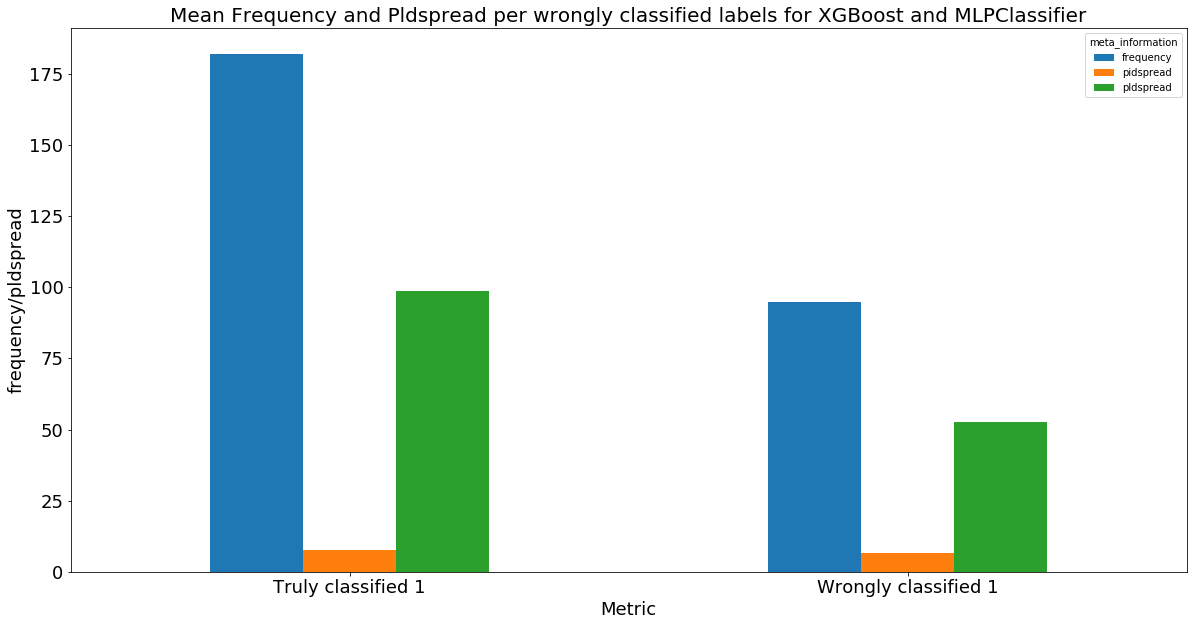

In [92]:
all_meta.pivot("class", "meta_information", "mean").plot(kind='bar', figsize=(20,10))
plt.title('Mean Frequency and Pldspread per wrongly classified labels for XGBoost and MLPClassifier',
         fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.xlabel('Metric', fontsize=18)
plt.yticks(fontsize=18, rotation=0)
plt.ylabel('frequency/pldspread', fontsize=18)
#plt.ylim(200)